In [ ]:
"""
Taylor Richardson
November 12, 2018.

In this analysis I used K means clustering and Silhouette clustering to try to determine clusters for both benign and malignant tumors.

This could be used to forecast if a patient's tumor is benign or malignant, based on the variables in the dataset.

The results from the clusters show that we have developed almost perfect accuracy for determining if a tumor is benign, but we will misdiagnos a malignant tumor as a benign one 39% of the time.

This means the analysis is ineffective because inaccuracy on such an important statistic, it makes the model unlikely to see use. Even with an overall accuracy score of 84%.

"""

In [3]:
#Load libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#Load dataset from the csv "IllnessStudy"
data = pd.read_csv('./illnessstudy.csv')

In [5]:
#Set independent and dependent variables
X = data.drop('diagnosis', axis = 1).values
Y = data.iloc[:, 0:29].values

In [7]:
#Check the X variable to see the format
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
#Use the KMeans function from sklearn with a max iterations of 300, will check for up to 10 clusters, random seed of 100 for retestability
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

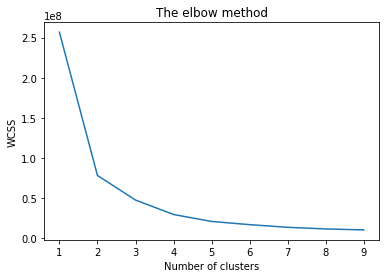

In [7]:
#Plot the kmeans function, which shoud look like an elbow, where the most effective number of clusters are
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [8]:
#Create silhouette coefficients to see numerically how many clusters are there
for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters = {}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient is 0.6972646156059465
For n_clusters = 3, The Silhouette Coefficient is 0.672866397865778
For n_clusters = 4, The Silhouette Coefficient is 0.5334614737117133
For n_clusters = 5, The Silhouette Coefficient is 0.510229299790784
For n_clusters = 6, The Silhouette Coefficient is 0.4857922435948333
For n_clusters = 7, The Silhouette Coefficient is 0.4678731706304421
For n_clusters = 8, The Silhouette Coefficient is 0.4653849511364952
For n_clusters = 9, The Silhouette Coefficient is 0.47181937507620303


In [9]:
#Create Kmeans with 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [10]:
#Apply KMeans clustering to test against our dataset
y_kmeans = kmeans.fit_predict(X)

In [11]:
#Add prediction column to dataset
data['Prediction'] = kmeans.labels_
data['Prediction'] = data['Prediction'].map({0:'B', 1: 'M'})
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Prediction
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,M,M
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,M,M
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,M,M
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,M,B
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,M,M
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,M,B
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,M,M
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,M,B
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,M,B
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,M,B


In [12]:
#Evaluate the algorithm 
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['B', 'M']
print(confusion_matrix(data['diagnosis'], data['Prediction']))
print(classification_report(data['diagnosis'],data['Prediction'], target_names=target_names))

[[356   1]
 [ 82 130]]
             precision    recall  f1-score   support

          B       0.81      1.00      0.90       357
          M       0.99      0.61      0.76       212

avg / total       0.88      0.85      0.84       569



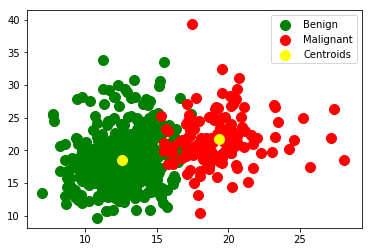

In [13]:
#Plot of clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Benign')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Malignant')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()